## 分类： plot classification probability

主要目的：

+ 使用iris鸢尾花数据集
+ 测试不同分类器对于特定范围数据集，分类为那一种鸢尾花的概率

流程：

1. 加载数据
2. 分类器选择
3. 分类概率比较

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# load sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:,0:2]
y = iris.target

n_features = X.shape[1]

In [6]:
print iris['DESCR']

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [7]:
# 查看iris数据集
for key, value in iris.items():
    try:
        print (key, value.shape)
    except:
        print (key)

('target_names', (3,))
('data', (150, 4))
('target', (150,))
DESCR
feature_names


## 分类器选择

1. L1 logistic
2. L2 logistic(OvR)
3. Liear SVC
4. L2 logistic(Multinomial)

In [9]:
C = 1.0
# 创建不同分类器， logistic regression 不能做多分类
classifiers = {'L1 logistic': LogisticRegression(C=C, penalty='l1'),
              'L2 logistic': LogisticRegression(C=C, penalty='l2'),
              'Linear SVC': SVC(kernel='linear', C=C, probability=True, random_state=0),
              'L2 logistic(Multinomial)': LogisticRegression(C=C, solver='lbfgs', multi_class='multinomial')}

n_classifiers = len(classifiers)

## 构建测试矩阵

1. `np.linspace(start, end, number)` # 等差数列
2. `np.meshgrid(x, y)` # 产生网格坐标
3. `numpy.c_` # numpy中特殊组件，能协助numpy连接，简化程序

In [15]:
xx, yy = np.meshgrid(np.linspace(1, 3, 3), np.linspace(4, 6, 3).T)
xfull = np.c_[xx.ravel(), yy.ravel()] 
print('xx = \n%s\n' % xx)
print('yy = \n%s\n' % yy)
print('xx.ravel() = %s\n' % xx.ravel())
print('Xfull= \n %s' % xfull)

xx = 
[[ 1.  2.  3.]
 [ 1.  2.  3.]
 [ 1.  2.  3.]]

yy = 
[[ 4.  4.  4.]
 [ 5.  5.  5.]
 [ 6.  6.  6.]]

xx.ravel() = [ 1.  2.  3.  1.  2.  3.  1.  2.  3.]

Xfull= 
 [[ 1.  4.]
 [ 2.  4.]
 [ 3.  4.]
 [ 1.  5.]
 [ 2.  5.]
 [ 3.  5.]
 [ 1.  6.]
 [ 2.  6.]
 [ 3.  6.]]


In [16]:
plt.figure(figsize=(3 * 2, n_classifiers * 2))
plt.subplots_adjust(bottom=.2, top=.95)

xx = np.linspace(3, 9, 100)
yy = np.linspace(1, 5, 100).T
xx, yy = np.meshgrid(xx, yy)
Xfull = np.c_[xx.ravel(), yy.ravel()]

## 测试分类器画出概率分布图

+ 用循环遍历所有分类器，并计算显示分类精确率
+ Xfull输入到classifier.predict_proba()
+ reshape((100, 100)) 便于与概率显示

classif_rate for L2 logistic(Multinomial) : 82.000000 
classif_rate for Linear SVC : 82.000000 
classif_rate for L1 logistic : 79.333333 
classif_rate for L2 logistic : 76.666667 


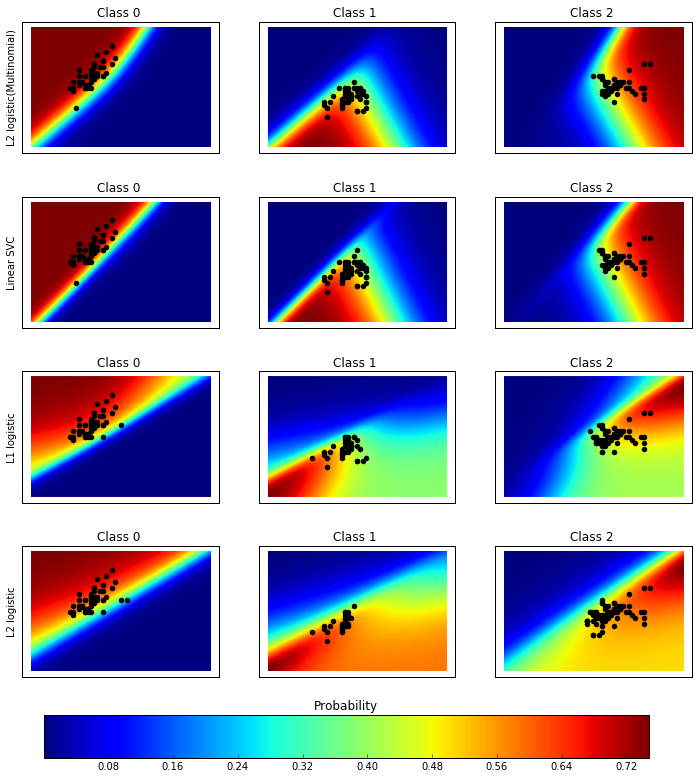

In [20]:
fig = plt.figure(figsize=(12, 12), dpi=300)

for index, (name, classifier) in enumerate(classifiers.items()):
    # 这里训练集和测试集相同，不符合规范，一般采用交叉验证的方法
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    classif_rate = np.mean(y_pred.ravel() == y.ravel())*100
    print('classif_rate for %s : %f ' % (name, classif_rate))
    # 可视化出概率情况
    probas = classifier.predict_proba(Xfull)
    n_classes = np.unique(y_pred).size
    for k in range(n_classes):
        plt.subplot(n_classifiers, n_classes, index*n_classes+k+1)
        plt.title('Class %d ' % k)
        if k==0:
            plt.ylabel(name)
        imshow_handle = plt.imshow(probas[:, k].reshape((100, 100)),
                                  extent=(3, 9, 1, 5), origin='lower')
        plt.xticks(())
        plt.yticks(())
        idx = (y_pred == k)
        if idx.any():
            plt.scatter(X[idx, 0], X[idx, 1], marker='o', c='k')
            
ax = plt.axes([0.15, 0.04, 0.7, 0.05])
plt.title('Probability')
plt.colorbar(imshow_handle, cax=ax, orientation='horizontal')

plt.show()
                            